# Demonstration of making an image of a styled Pandas dataframe

This is meant to demonstrate steps needed. Everything should be installed and ready of you are running this in sessions launched from [fomightez/dataframe2img](https://github.com/fomightez/dataframe2img).

In the current form, these scripts and demonstration notebook work in JupyterLab, too.

## Preparation 

Let's make a dataframe to use as an example.

In [1]:
import pandas as pd
sales = [('Jones LLC', 177887, 'yes'),
         ('Jones LLC', 12387, 'yes'),
         ('Jones LLC', 1772287, 'yes'),
         ('Jones LLC', 1187, 'maybe'),
         ('Jones LLC', 1773297, 'maybe'),
         ('Jones LLC', 19897, 'no'),
         ('Alpha Co', 157987, 'yes'),
         ('Alpha Co', 158981, 'yes'),
         ('Alpha Co', 159983, 'yes'),
         ('Alpha Co', 159333, 'no'),
         ('Alpha Co', 167987, 'yes'),
         ('Alpha Co', 158117, 'yes'),
         ('Alpha Co', 1999917, 'maybe'),
         ('Alpha Co', 193917, 'maybe'),
         ('Alpha Co', 1933917, 'maybe'),
         ('Alpha Co', 256521, 'no'),
         ('Blue Inc', 111947, 'no')]
labels = ['Manufacturer', 'Item', 'In_Stock']
df = pd.DataFrame.from_records(sales, columns=labels)
df

,Manufacturer,Item,In_Stock
0,Jones LLC,177887,yes
1,Jones LLC,12387,yes
2,Jones LLC,1772287,yes
3,Jones LLC,1187,maybe
4,Jones LLC,1773297,maybe
5,Jones LLC,19897,no
6,Alpha Co,157987,yes
7,Alpha Co,158981,yes
8,Alpha Co,159983,yes
9,Alpha Co,159333,no


## Style the dataframe

Now to stylize the dataframe.

In [2]:
df_styled = df.copy()
def highlight_absence_presence(val, colors=['crimson','cornflowerblue']):
    '''
    highlight the absent or present features.
    
    The colors are in the order for indicating absence 
    (first position) or presence (2nd postion).
    
    Takes:
    a cell value (Boolean or string)
    
    Returns:
    - color attribute definition or nothing
    '''
    if val == False or val == "no":
        return 'background-color: {}'.format(colors[0])
    elif val == True or val == "yes":
        return 'background-color: {}'.format(colors[1])
    else:
        return ''
df_styled = df_styled.style.applymap(highlight_absence_presence, subset=['In_Stock'])
df_styled

,Manufacturer,Item,In_Stock
0,Jones LLC,177887,yes
1,Jones LLC,12387,yes
2,Jones LLC,1772287,yes
3,Jones LLC,1187,maybe
4,Jones LLC,1773297,maybe
5,Jones LLC,19897,no
6,Alpha Co,157987,yes
7,Alpha Co,158981,yes
8,Alpha Co,159983,yes
9,Alpha Co,159333,no


## Convert dataframe to HTML

Based on [here](https://stackoverflow.com/a/50097322/8508004).

In [3]:
html = df_styled.render()

## Save rendered html as an image file

Based on [here](https://stackoverflow.com/a/50097322/8508004). (Use of xvfbwrapper added based on [here](https://www.reddit.com/r/Python/comments/82z6cw/best_python_library_for_generating_pdfs/), search 'xvfbwrapper'.)

In [4]:
import imgkit
from xvfbwrapper import Xvfb
vdisplay = Xvfb()
vdisplay.start()
imgkit.from_string(html, 'styled_df.png')

QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-jovyan'
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

## View the image file

By viewing it in the notebook wihin a cell, it will get stored within the notebook as Base64 code and be rendered when the notebook is repopened even if no file `styled_df.png` is present in the new session yet.

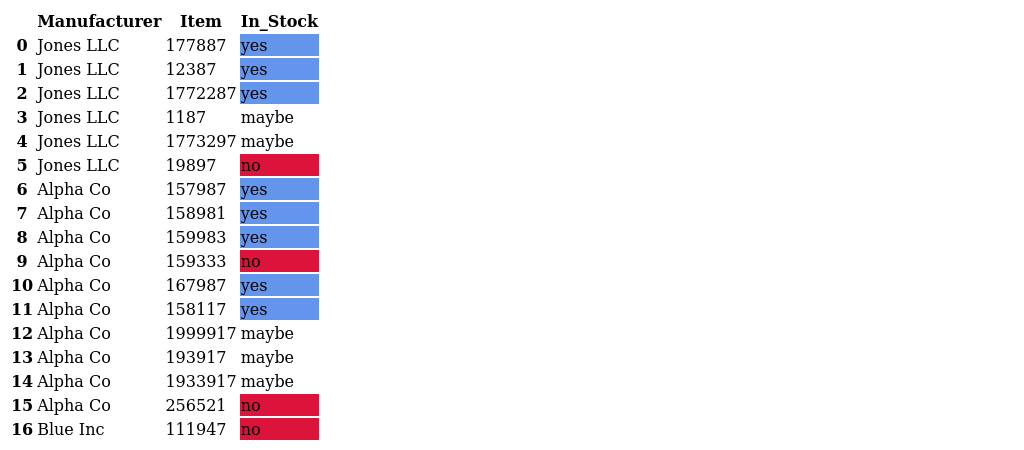

In [5]:
from IPython.display import Image
Image("styled_df.png")

You can now add your dataframes here and save them as image files for showing in static form notebooks elsewhere upon opening.

Enjoy!

-----

----